# 本项目需解决的问题
本项目分析P2P平台Lending Club的贷款数据，探索数据分析过程中，并尝试回答以下3个问题：

利率与风险成正比，风险越高，利率越高，违约的可能线性越大，从P2P平台的数据来看，影响风险的因素有哪些？（为后续建模做准备）
了解P2P平台的业务特点、产品类型、资产质量、风险定价？
有什么建议？

# 分析思路
我们可以将信贷信息分为信贷硬信息和信贷软信息。
任何可以量化客户的还款能力的信息均可以用作硬信息，可勾勒客户还款意愿的信息则为软信息。
信贷硬信息： 站在企业的角度，硬信息主要包括财务三大报表（资产负债表、利润表和现金流量表）以及信贷记录；站在个人角度硬信息主要包括：个人年收入 、资产状况（借款是否拥有房产、车或理财产品）。
信贷软信息： 过往的信贷记录比较直接了解客户的还款意愿，以往发生违约次数较多的客户再次发生违约的概率相比其他客户大。客户的学历、年龄、目前工作所在单位的级别和性别等信息也可作为软信息。
因此，我们主要围绕着“客户是否具有偿还能力，是否具有偿还意愿”展开探索分析。

# 项目背景
作为旧金山的一家个人对个人的借贷公司，Lending Club成立于2006年。他们是第一家注册为按照美国证券交易委员会SEC(Securities and Exchange Commission)的安全标准向个人提供个人贷款的借贷公司。与传统借贷机构最大的不同是，Lending Club利用网络技术打造的这个交易平台，直接连接了个人投资者和个人借贷者，通过此种方式，缩短了资金流通的环节，尤其是绕过了传统的大银行等金融机构，使得投资者和借贷者都能得到更多实惠、更快捷。对于投资者来说可以获得更好的回报，而对于借贷者来说，则可以获得相对较低的贷款利率。
Lending Club 介绍《来认识一下即将上市的全球最大P2P网贷公司Lending Club》

# 数据集

数据集是Lending Club平台发生借贷的业务数据（2017年第二季），具体数据集可以从Lending Club官网下载

本项目报告分析，我将如何运用Python操作数据和探索分析数据的思考过程均记录下来。

前期准备

# 第一步，导入我们要用的库

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
from pyecharts import Pie

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

注意：不要漏了%matplotlib inline。IPython提供了很多魔法命令，使得在IPython环境中的操作更加得心应手，使用%matplotlib inline在绘图时，将图片内嵌在交互窗口，而不是弹出一个图片窗口。具体请查看Stackoverflow的解释。

# 获取数据
第二步，使用Pandas解析数据

Pandas是基于NumPy的一个非常好用的库，无论是读取数据、处理数据，用它都非常简单。学习Pandas最好的方法就是查看官方文档 。
数据集的格式是CSV，因此我们用到pandas.read_csv方法，同时也将CSV内容转化成矩阵的格式。

In [27]:
data=pd.read_csv('./LoanStats_2017Q2.csv',encoding='utf-8',skiprows=1)

# 探索分析数据（EDA）
一旦获得了数据，下一步就是检查和探索他们。在这个阶段，主要的目标是合理地检查数据。例如：如果数据有唯一的标记符，是否真的只有一个；数据是什么类型，检查最极端的情况。他们是否有意义，有什么需要删除的吗？数据应该怎么调整才能适用于接下来的分析和挖掘？此外，数据集还有可能存在异常值。同时，我将会通过对数据进行简单的统计测试，并将其可视化。 检查和探索数据的过程非常关键。因为下一步需要清洗和准备处理这些数据，只有进入模型的数据质量是好的，才能构建好的模型。（避免Garbage in, Garbage out）

首先预览基本内容，Pandas为我们提供很多可以方便查看和检查数数据的方法，有df.head(n)、df.tail(n)、df.shape()、df.info() 等 。

查看表格的行数和列数

In [28]:
data.shape

(105453, 145)

In [29]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,7500.0,7500.0,7500.0,36 months,7.35%,232.79,A,A4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2300.0,2300.0,2300.0,36 months,12.62%,77.08,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,16000.0,16000.0,16000.0,60 months,12.62%,360.95,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,13000.0,13000.0,13000.0,36 months,11.99%,431.73,B,B5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,20400.0,20400.0,20400.0,36 months,9.44%,652.91,B,B1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
data.iloc[0]

id                                                           NaN
member_id                                                    NaN
loan_amnt                                                   7500
funded_amnt                                                 7500
funded_amnt_inv                                             7500
term                                                   36 months
int_rate                                                   7.35%
installment                                               232.79
grade                                                          A
sub_grade                                                     A4
emp_title                                           Project Lead
emp_length                                             10+ years
home_ownership                                          MORTGAGE
annual_inc                                                113000
verification_status                              Source Verified
issue_d                  

由上图我们发现一些列有很多缺失值，这些缺失值对我们的数据分析没有意义，因此，首先把含有许多缺失值的列删除，同时将已清洗过的数据新建CSV保存。

# 处理缺失值

统计每列属性缺失值的数量。

In [31]:
def not_null_count(column):
    column_null = pd.isnull(column)  #判断某列属性是否存在缺失值
    null = column[column_null]
    return len(null)
column_null_count = data.apply(not_null_count)  
print (column_null_count)

id                                            105451
member_id                                     105453
loan_amnt                                          2
funded_amnt                                        2
funded_amnt_inv                                    2
term                                               2
int_rate                                           2
installment                                        2
grade                                              2
sub_grade                                          2
emp_title                                       6784
emp_length                                      6699
home_ownership                                     2
annual_inc                                         2
verification_status                                2
issue_d                                            2
loan_status                                        2
pymnt_plan                                         2
url                                           

In [32]:
half_count = len(data)/2 # 设定阀值
data = data.dropna(thresh = half_count, axis = 1 ) #若某一列数据缺失的数量超过阀值就会被删除
#data = data.drop(['desc', 'url'], axis = 1) # 删除某些加载了网址的url 和 描述的列
data.to_csv('loans_2017q2.csv', index = False) # 将预处理后的数据转化为csv

再次用pandas解析预处理过的数据文件并预览基本信息。

In [33]:
loans = pd.read_csv('loans_2017q2.csv')
loans.shape
loans.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,7500.0,7500.0,7500.0,36 months,7.35%,232.79,A,A4,Project Lead,10+ years,...,0.0,0.0,0.0,417686.0,90921.0,35000.0,92511.0,N,Cash,N
1,2300.0,2300.0,2300.0,36 months,12.62%,77.08,C,C1,NaN,NaN,...,100.0,0.0,0.0,7100.0,3911.0,3400.0,0.0,N,Cash,N
2,16000.0,16000.0,16000.0,60 months,12.62%,360.95,C,C1,teacher,10+ years,...,100.0,0.0,0.0,319900.0,44830.0,2400.0,16000.0,N,Cash,N
3,13000.0,13000.0,13000.0,36 months,11.99%,431.73,B,B5,Paramedic,10+ years,...,100.0,0.0,0.0,19602.0,15332.0,7800.0,11802.0,N,Cash,N
4,20400.0,20400.0,20400.0,36 months,9.44%,652.91,B,B1,Manager,10+ years,...,0.0,0.0,0.0,103358.0,62335.0,44400.0,56458.0,N,Cash,N


数据从145列减少至103列。

In [34]:
loans.dtypes  # 查看数据类型 

loan_amnt                     float64
funded_amnt                   float64
funded_amnt_inv               float64
term                           object
int_rate                       object
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                   float64
earliest_cr_line               object
inq_last_6mths                float64
mths_since_last_delinq        float64
open_acc                      float64
pub_rec     

In [35]:
loans.describe()  

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,105451.000000,105451.000000,105451.000000,105451.000000,1.054510e+05,105376.000000,105451.000000,105451.000000,54332.00000,105451.000000,...,105451.000000,105451.000000,105451.000000,104305.000000,105451.000000,105451.000000,1.054510e+05,1.054510e+05,105451.000000,1.054510e+05
mean,14589.070516,14589.070516,14585.195731,436.778556,8.045197e+04,18.987276,0.356052,0.509507,33.28613,11.849655,...,0.093380,2.073257,93.482781,40.556624,0.141089,0.075163,1.850722e+05,5.296400e+04,23659.481589,4.644022e+04
std,9478.834204,9478.834204,9476.119506,280.169449,6.822064e+04,14.145490,0.962047,0.809095,21.91821,5.776871,...,0.557542,1.838137,9.748996,36.008256,0.391480,0.441561,1.847481e+05,5.140751e+04,23191.726471,4.615661e+04
min,1000.000000,1000.000000,1000.000000,30.120000,0.000000e+00,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,7000.000000,7000.000000,7000.000000,232.640000,4.800000e+04,12.230000,0.000000,0.000000,15.00000,8.000000,...,0.000000,1.000000,90.400000,0.000000,0.000000,0.000000,5.294800e+04,2.160150e+04,8500.000000,1.683250e+04
50%,12000.000000,12000.000000,12000.000000,361.380000,6.800000e+04,18.120000,0.000000,0.000000,30.00000,11.000000,...,0.000000,2.000000,97.400000,33.300000,0.000000,0.000000,1.197400e+05,3.898700e+04,16800.000000,3.500000e+04
75%,20000.000000,20000.000000,20000.000000,584.370000,9.700000e+04,24.580000,0.000000,1.000000,49.00000,15.000000,...,0.000000,3.000000,100.000000,66.700000,0.000000,0.000000,2.680685e+05,6.681950e+04,30900.000000,6.209950e+04
max,40000.000000,40000.000000,40000.000000,1719.830000,8.900000e+06,999.000000,42.000000,5.000000,161.00000,88.000000,...,42.000000,22.000000,100.000000,100.000000,7.000000,22.000000,4.460960e+06,1.310848e+06,407900.000000,1.349413e+06


Pandas的describe()不能统计数据类型为object的属性，部分数据int_rate和emp_length数据类型都是object，稍后分析数据时需将它们转化为类型为floate的数字类型。

数据集的属性较多，我们初步聚焦几个重要特征展开分析，特别是我们最关心的属性贷款状态。

In [36]:
used_col = ['loan_amnt', 'term', 'int_rate', 'grade', 'issue_d', 'addr_state', 'loan_status','purpose', 'annual_inc', 'emp_length'] # 贷款金额、贷款期限、贷款利率、信用评级、业务发生时间、业务发生所在州、贷款状态、贷款用途
used_data = loans[used_col]

In [37]:
used_data.head(5)  # 数据预览

,loan_amnt,term,int_rate,grade,issue_d,addr_state,loan_status,purpose,annual_inc,emp_length
0,7500.0,36 months,7.35%,A,Jun-2017,MD,Fully Paid,debt_consolidation,113000.0,10+ years
1,2300.0,36 months,12.62%,C,Jun-2017,NY,Charged Off,credit_card,10000.0,NaN
2,16000.0,60 months,12.62%,C,Jun-2017,MA,Current,debt_consolidation,94000.0,10+ years
3,13000.0,36 months,11.99%,B,Jun-2017,MN,Current,debt_consolidation,85000.0,10+ years
4,20400.0,36 months,9.44%,B,Jun-2017,CA,Current,car,44000.0,10+ years


In [38]:
def not_null_count(column):
    column_null = pd.isnull(column)  #判断某列属性是否存在缺失值
    null = column[column_null]
    return len(null)
column_null_count = used_data.apply(not_null_count)  
print (column_null_count)

loan_amnt         2
term              2
int_rate          2
grade             2
issue_d           2
addr_state        2
loan_status       2
purpose           2
annual_inc        2
emp_length     6699
dtype: int64


单变量分析

1.贷款状态分布
处理异常值

In [39]:
used_data[used_data['loan_status'] == 'n']

,loan_amnt,term,int_rate,grade,issue_d,addr_state,loan_status,purpose,annual_inc,emp_length


为了更方便分析，我们将贷款状态进行分类变量编码，主要将贷款状态分为正常和违约，贷款状态分类依据主要参考 The 10 loan status variants explained

In [41]:
#使用Pandas replace函数定义新函数：

def coding(col, codeDict):

    colCoded = pd.Series(col, copy=True)
    for key, value in codeDict.items():
        colCoded.replace(key, value, inplace=True)

    return colCoded

#把贷款状态LoanStatus编码为违约=1, 正常=0:

pd.value_counts(used_data["loan_status"])

used_data["Loan_Status_Coded"] = coding(used_data["loan_status"], {'Current':0,'Fully Paid':0,'In Grace Period':1,'Late (31-120 days)':1,'Late (16-30 days)':1,'Charged Off':1,'Default':0})



pd.value_counts(used_data["Loan_Status_Coded"])

0.0    94963
1.0    10488
Name: Loan_Status_Coded, dtype: int64

In [42]:
[i for i in pd.value_counts(used_data['Loan_Status_Coded'])]  # Pyecharts 目前支持Numpy和Pandas的数据类型，因此需做数据类型转换

[94963, 10488]

In [43]:
# 用新学的Pyecharts作图

attr = ["正常", "违约"]
pie = Pie("贷款状态占比")
pie.add("", attr, [int(i) for i in pd.value_counts(used_data["Loan_Status_Coded"])] ,is_label_show=True)
pie

从图中可以看出，平台贷款发生违约的数量占少数。贷款状态为正常的有94963个，贷款正常状态占比为90.05%。贷款状态将作为我们建模的标签，贷款状态正常和贷款状态违约两者数量不平衡，绝大多数常见的机器学习算法对于不平衡数据集都不能很好地工作，下一篇项目报告中，我们将会解决样本不平衡的问题。

# 2.贷款金额分布


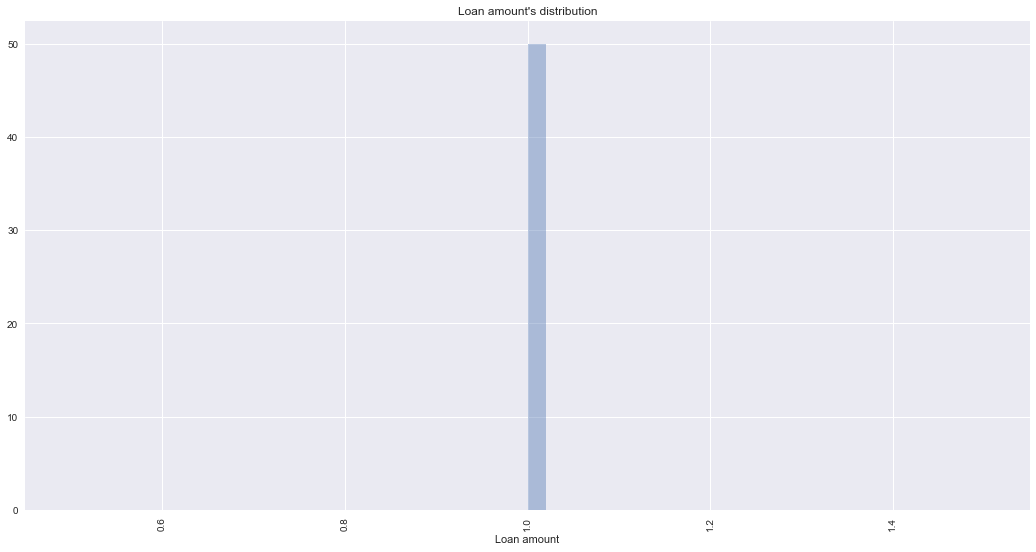

In [53]:
plt.figure(figsize=(18, 9))
sns.set()
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth":2 } )
used_data['loan_amnt']=used_data['loan_amnt'].notnull()
# used_data['loan_amnt'].astype(np.int64)
sdisplot_loan = sns.distplot(used_data['loan_amnt'])
plt.xticks(rotation=90)
plt.xlabel('Loan amount')
plt.title('Loan amount\'s distribution')
sdisplot_loan.figure.savefig("Loan_amount")

3.贷款期限分布


In [54]:
pd.value_counts(loans["term"])  # 分类统计贷款期限

 36 months    77105
 60 months    28346
Name: term, dtype: int64

In [55]:
[i for i in pd.value_counts(loans["term"])]  #数据转换
# 贷款期限占比可视化
attr = ["36个月", "60个月"]
pie = Pie("贷款期限占比")
pie.add("", attr, [float(i) for i in pd.value_counts(loans["term"])] ,is_label_show=True)
pie

平台贷款产品期限分为36个月和60个月两种，其中贷款期限为60个月的贷款占比为26.88%，贷款期限为36个月的贷款占比为73.12%。一般来说贷款期限越长，不确定性越大，违约的可能性更大，期限较长的贷款产品风险越高 。从期限角度看，平台风险偏小的资产占大部分。

4.贷款产品用途种类比较


In [56]:
used_data['purpose'].value_counts()# 按借款用途统作统计

debt_consolidation    58557
credit_card           21261
home_improvement       9222
other                  7140
major_purchase         2616
medical                1648
car                    1334
vacation               1170
small_business         1034
moving                  945
house                   453
renewable_energy         70
wedding                   1
Name: purpose, dtype: int64

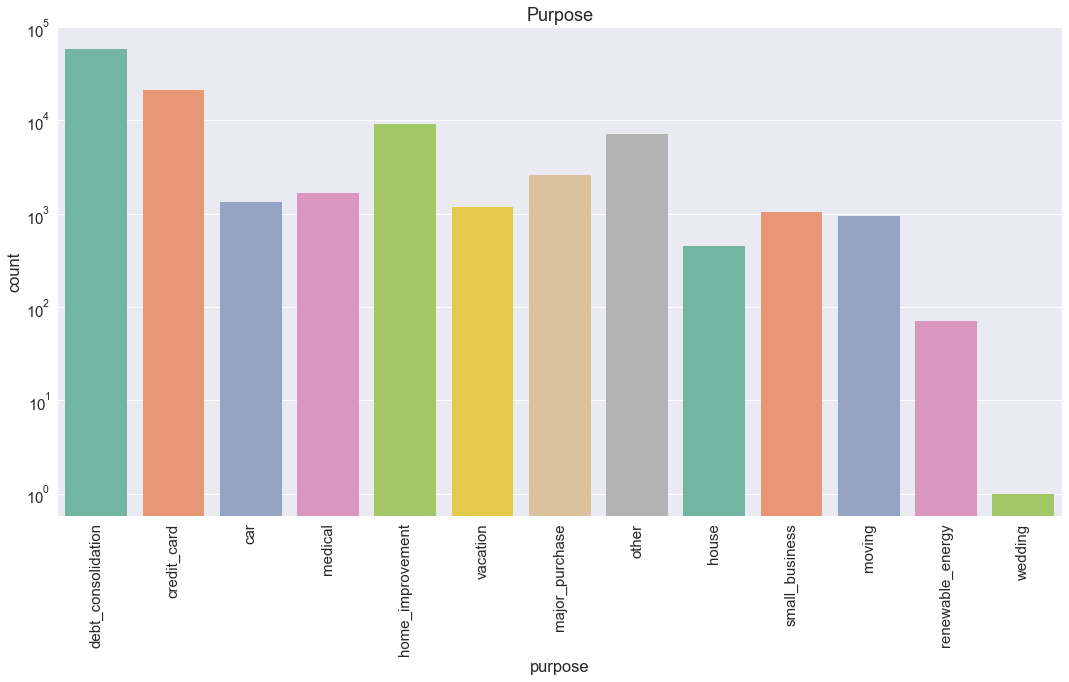

In [57]:
plt.figure(figsize=(18, 9))
sns.set()
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
total = float(len(loans.index))
ax = sns.countplot(x="purpose", data=used_data, palette="Set2")
ax.set(yscale = "log")
plt.xticks(rotation=90)
plt.title('Purpose')
plt.show()
ax.figure.savefig("Purpose")

P2P平台贷款用途最多的为债务重组（借新债还旧债），其次是信用卡还款，第三是住房改善。一般来说，贷款用途为债务重组和信用卡还款的客户现金流较为紧张，此类客户也是在传统银行渠道无法贷款才转来P2P平台贷款，这部分客户的偿还贷款能力较弱，发生违约的可能性较高。还有部分贷款用途为Other的贷款，需要通过其他维度来分析其风险。

5.客户信用等级占比


In [58]:
used_data['grade'].value_counts()

C    36880
B    31301
A    17898
D    12015
E     4847
F     1725
G      785
Name: grade, dtype: int64

In [59]:
attr = ["C", "B","A","D","E","F","G"]
pie = Pie("信用等级比例")
pie.add("", attr, [float(i) for i in pd.value_counts(loans["grade"])] ,is_label_show=True)
pie

Lending Club平台对客户的信用等级分7类，A~G，信用等级为A的客户信用评分最高，信用等级为G的客户最低，信用等级的客户发生违约的可能性更低。目前，平台客户信用等级占比较多的客户为C类，其次是B类和A类，三者合计占比为81.62%。此外信用等级为E、F、G类的客户占比为6.99%。可以看出Lending Club授信部门对申请人的资信情况把关较严。

6.贷款利率种类分布


In [60]:
used_data['int_rate_num']= used_data['int_rate'].str.rstrip("%").astype("float") #数据转换
used_data.tail() #发现空值
used_data.dropna( inplace=True) #处理空值
used_data.tail() #再次检查

,loan_amnt,term,int_rate,grade,issue_d,addr_state,loan_status,purpose,annual_inc,emp_length,Loan_Status_Coded,int_rate_num
105446,True,60 months,23.99%,E,Apr-2017,CO,Charged Off,other,107000.0,< 1 year,1.0,23.99
105447,True,36 months,7.99%,A,Apr-2017,PA,Current,debt_consolidation,65000.0,10+ years,0.0,7.99
105448,True,36 months,16.99%,D,Apr-2017,VA,Current,debt_consolidation,37000.0,8 years,0.0,16.99
105449,True,36 months,11.44%,B,Apr-2017,NY,Current,credit_card,41000.0,5 years,0.0,11.44
105450,True,60 months,25.49%,E,Apr-2017,TX,Charged Off,debt_consolidation,105700.0,4 years,1.0,25.49


In [61]:
used_data.describe()

,annual_inc,Loan_Status_Coded,int_rate_num
count,9.875400e+04,98754.000000,98754.000000
mean,8.250539e+04,0.097475,13.278092
std,6.950554e+04,0.296604,5.170052
min,0.000000e+00,0.000000,5.320000
25%,5.000000e+04,0.000000,9.930000
50%,7.000000e+04,0.000000,12.620000
75%,1.000000e+05,0.000000,15.990000
max,8.900000e+06,1.000000,30.990000


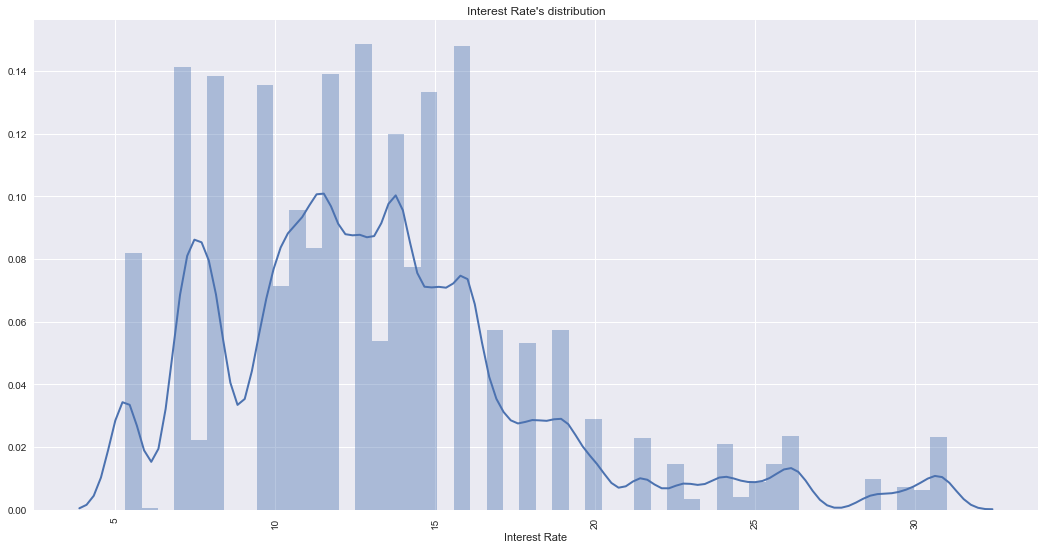

In [62]:
plt.figure(figsize=(18, 9))
sns.set()
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth":2 } )
sdisplot_loan = sns.distplot(used_data['int_rate_num'] )
plt.xticks(rotation=90)
plt.xlabel('Interest Rate')
plt.title('Interest Rate\'s distribution')
sdisplot_loan.figure.savefig("Interest Rate")

Lending Club平台贷款利率呈现右偏正态分布，利率中位数12.62%，利率最高值为31.00%，利率最小值为5.32%。利率是资金的价格，利率越高，借款人借贷成本越高，借款人违约的可能性越高。

# 多维变量分析

1.探索贷款与时间的关系
首先对时间数据类型进行转换

In [63]:
used_data['issue_d2'] = pd.to_datetime(used_data['issue_d'])
used_data.head()

,loan_amnt,term,int_rate,grade,issue_d,addr_state,loan_status,purpose,annual_inc,emp_length,Loan_Status_Coded,int_rate_num,issue_d2
0,True,36 months,7.35%,A,Jun-2017,MD,Fully Paid,debt_consolidation,113000.0,10+ years,0.0,7.35,2017-06-01
2,True,60 months,12.62%,C,Jun-2017,MA,Current,debt_consolidation,94000.0,10+ years,0.0,12.62,2017-06-01
3,True,36 months,11.99%,B,Jun-2017,MN,Current,debt_consolidation,85000.0,10+ years,0.0,11.99,2017-06-01
4,True,36 months,9.44%,B,Jun-2017,CA,Current,car,44000.0,10+ years,0.0,9.44,2017-06-01
5,True,60 months,15.05%,C,Jun-2017,CA,Current,debt_consolidation,69800.0,6 years,0.0,15.05,2017-06-01


In [64]:
data_group_by_date = used_data.groupby(['issue_d2']).sum()
data_group_by_date.reset_index(inplace=True)
data_group_by_date['issue_month'] = data_group_by_date['issue_d2'].apply(lambda x: x.to_period('M')) # 新增月份列
loan_amount_group_by_month = data_group_by_date.groupby('issue_month')['loan_amnt'].sum()  #按月份统计贷款金额
loan_amount_group_by_month_df = pd.DataFrame(loan_amount_group_by_month).reset_index() # 输出结果转成DataFrame
loan_amount_group_by_month_df

,issue_month,loan_amnt
0,2017-04,27646.0
1,2017-05,35263.0
2,2017-06,35845.0


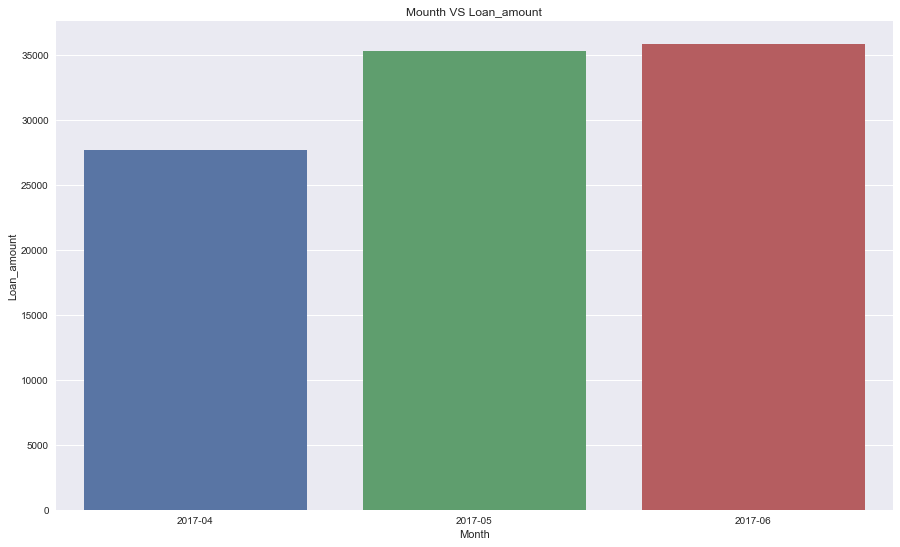

In [65]:
# 可视化
plt.figure(figsize=(15, 9))
sns.set()
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2})
plot1 = sns.barplot(x='issue_month', y= 'loan_amnt', data = loan_amount_group_by_month_df,)
plt.xlabel('Month')
plt.ylabel('Loan_amount')
plt.title('Mounth VS Loan_amount')
plot1.figure.savefig("Mounth VS Loan_amount.png")

二季度4月份贷款最低，而5月和6月的贷款金额基本持平。由于本数据集只包含2017Q2的数据，如果数据集能包括横跨几年业务数据，可以将数据按年按月做横向和纵向对比，更能反映公司业务的发展情况。初步看来，Leding Club 平台在2017Q2业务持续增长。

2.探索贷款金额与州之间的关系


In [66]:
data_group_by_state = used_data.groupby(['addr_state'])['loan_amnt'].sum() # 按州统计贷款金额
data_group_by_state_df= data_group_by_state.reset_index() # 将结果转为 dataframe

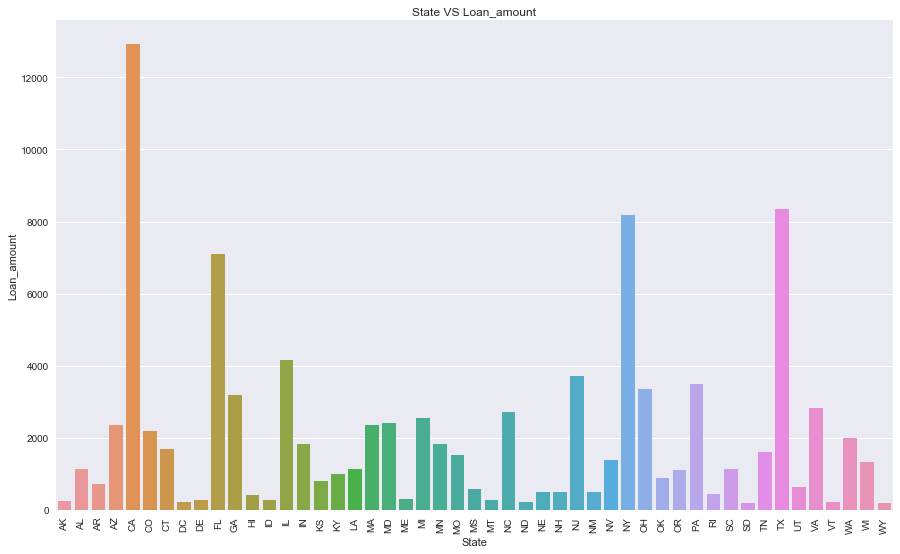

In [67]:
sns.set()
plt.figure(figsize=(15, 9))
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 5})
sbarplot = sns.barplot(y='loan_amnt' , x='addr_state' , data=data_group_by_state_df )
plt.xlabel('State')
plt.ylabel('Loan_amount')
plt.xticks(rotation=90)
plt.title('State VS Loan_amount')
sbarplot.figure.savefig("State VS Loan_amount")

得知Lending Club 的总部在加州，因此加州的市场开拓也相对其他较好。其次是德克萨斯州和纽约州。

同时，从风险防范角度来看，应重点审核这几个城市贷款申请人的基本信息。

3.探索信用评级、贷款期限和利率的关系


In [68]:
used_data['int_rate_num']= used_data['int_rate'].str.rstrip("%").astype("float")
data_group_by_grade_term = used_data.groupby(['grade', 'term'])['int_rate_num'].mean()
data_group_by_grade_term_df = pd.DataFrame(data_group_by_grade_term).reset_index()
data_group_by_grade_term_pivot = data_group_by_grade_term_df.pivot(index='grade', columns='term', values='int_rate_num')
data_group_by_grade_term_pivot  #  输出数据透视表

term,36 months,60 months
grade,,
A,6.921073,7.977273
B,10.559099,10.661741
C,14.145370,14.469082
D,18.663130,18.577578
E,24.469048,24.950276
F,29.795381,29.657868
G,30.884250,30.877246


In [69]:
used_data['grade'].value_counts()  # 查看信用评级的分布

C    34543
B    29238
A    16900
D    11148
E     4553
F     1631
G      741
Name: grade, dtype: int64

从表格可以看出，P2P平台的利率最高档为30%，而利率最低档为7%左右，总体利率水平也相对传统银行较高。 信用评级从A到G，A的的借款人信用评分最高，财务状况较好，违约发生的可能性较低，因此利率也相对较低。

贷款期限长意味着不确定性增加，风险也随之增加，期限较长的贷款在同信用等级下的借款利率也相对高。

4.探索贷款用途与利率的关系


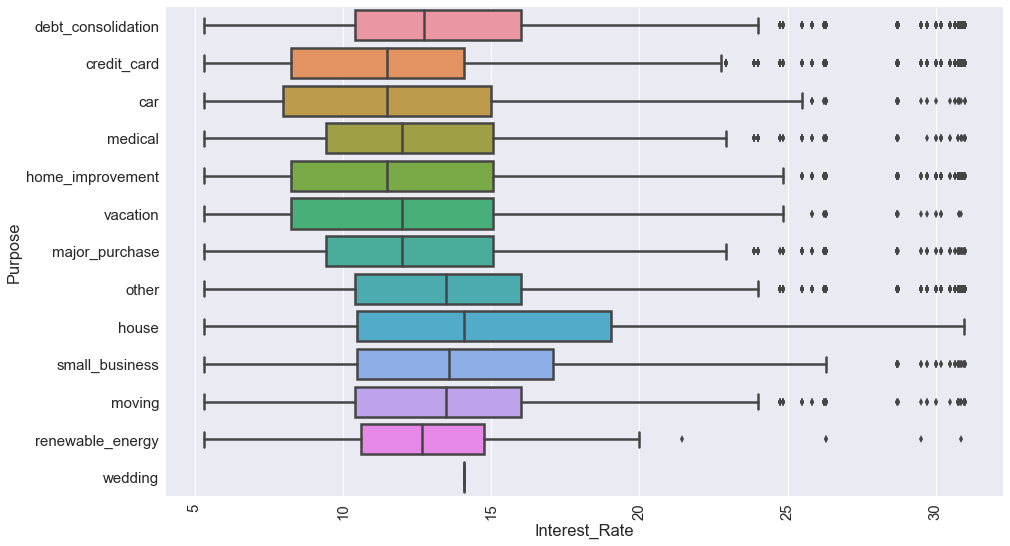

In [70]:
plt.figure(figsize=(15, 9))
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
loans['int_rate_num'] = loans['int_rate'].str.rstrip("%").astype("float")
sboxplot = sns.boxplot(y="purpose", x="int_rate_num", data=loans)
sns.despine(top=True)
plt.xlabel('Interest_Rate')
plt.ylabel('Purpose')
plt.xticks(rotation=90)
plt.show()
sboxplot.figure.savefig("Purpose VS Rate")


贷款用途分别为house、small_business以及Other的贷款利率较高。其中贷款用途为house的贷款利率为最高。

5.探索贷款金额与利率之间的关系


<Figure size 1080x648 with 0 Axes>

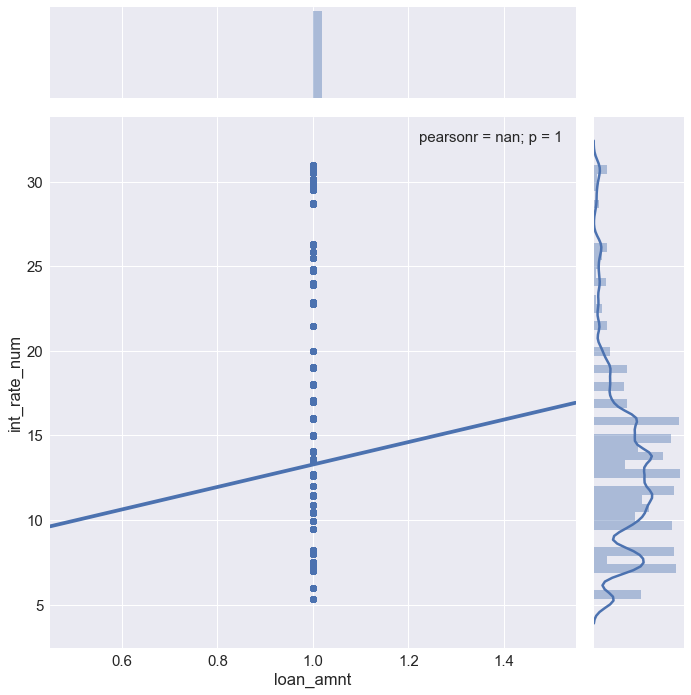

In [71]:
plt.figure(figsize=(15, 9))
j_plot = sns.jointplot("loan_amnt", "int_rate_num", data=used_data, kind="reg",size=10)
j_plot.savefig("Loan amount VS Interest Rate")

图的中间是贷款金额和利率的线性关系图，图的上方和右方分别是贷款金额和利率的分布图。我们从图中并没有发现贷款金额和贷款利率有明显的关系。

6.探索贷款利率与违约次数之间的关系

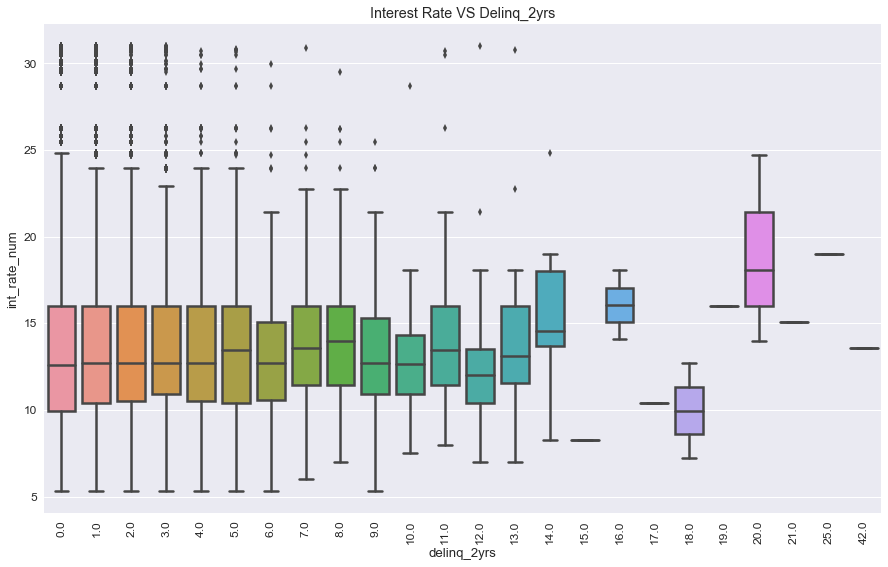

In [72]:
plt.figure(figsize=(15, 9))
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2.5})
sboxplot2 = sns.boxplot(x="delinq_2yrs", y="int_rate_num", data=loans)
sns.despine(top=True)
plt.xticks(rotation=90)
plt.title('Interest Rate VS Delinq_2yrs')
sboxplot2.figure.savefig("Interest Rate VS Delinq_2yrs")

违约次数越多的人意味着自身财务状况较差，偿付能力也较低，因此此类客户贷款风险越高，对此部分资产应给予更高的利率定价。

7.探索利率、收入、工作年限以及贷款状态之间的关系


In [94]:
#替换变量的第二种方法，创建mapping

# mapping_dict = {
#     "emp_length": {
#         "10+ years": 10,
#         "9 years": 9,
#         "8 years": 8,
#         "7 years": 7,
#         "6 years": 6,
#         "5 years": 5,
#         "4 years": 4,
#         "3 years": 3,
#         "2 years": 2,
#         "1 year": 1,
#         "< 1 year": 0,
#         "n/a": 0
#     }
# }


used_data.dtypes
used_data.head()
# used_data = used_data.replace(mapping_dict)
# 数据转换
used_data[ "annual_inc"]
used_data[ "annual_inc"] = used_data[ "annual_inc"].dropna()  

数据可视化

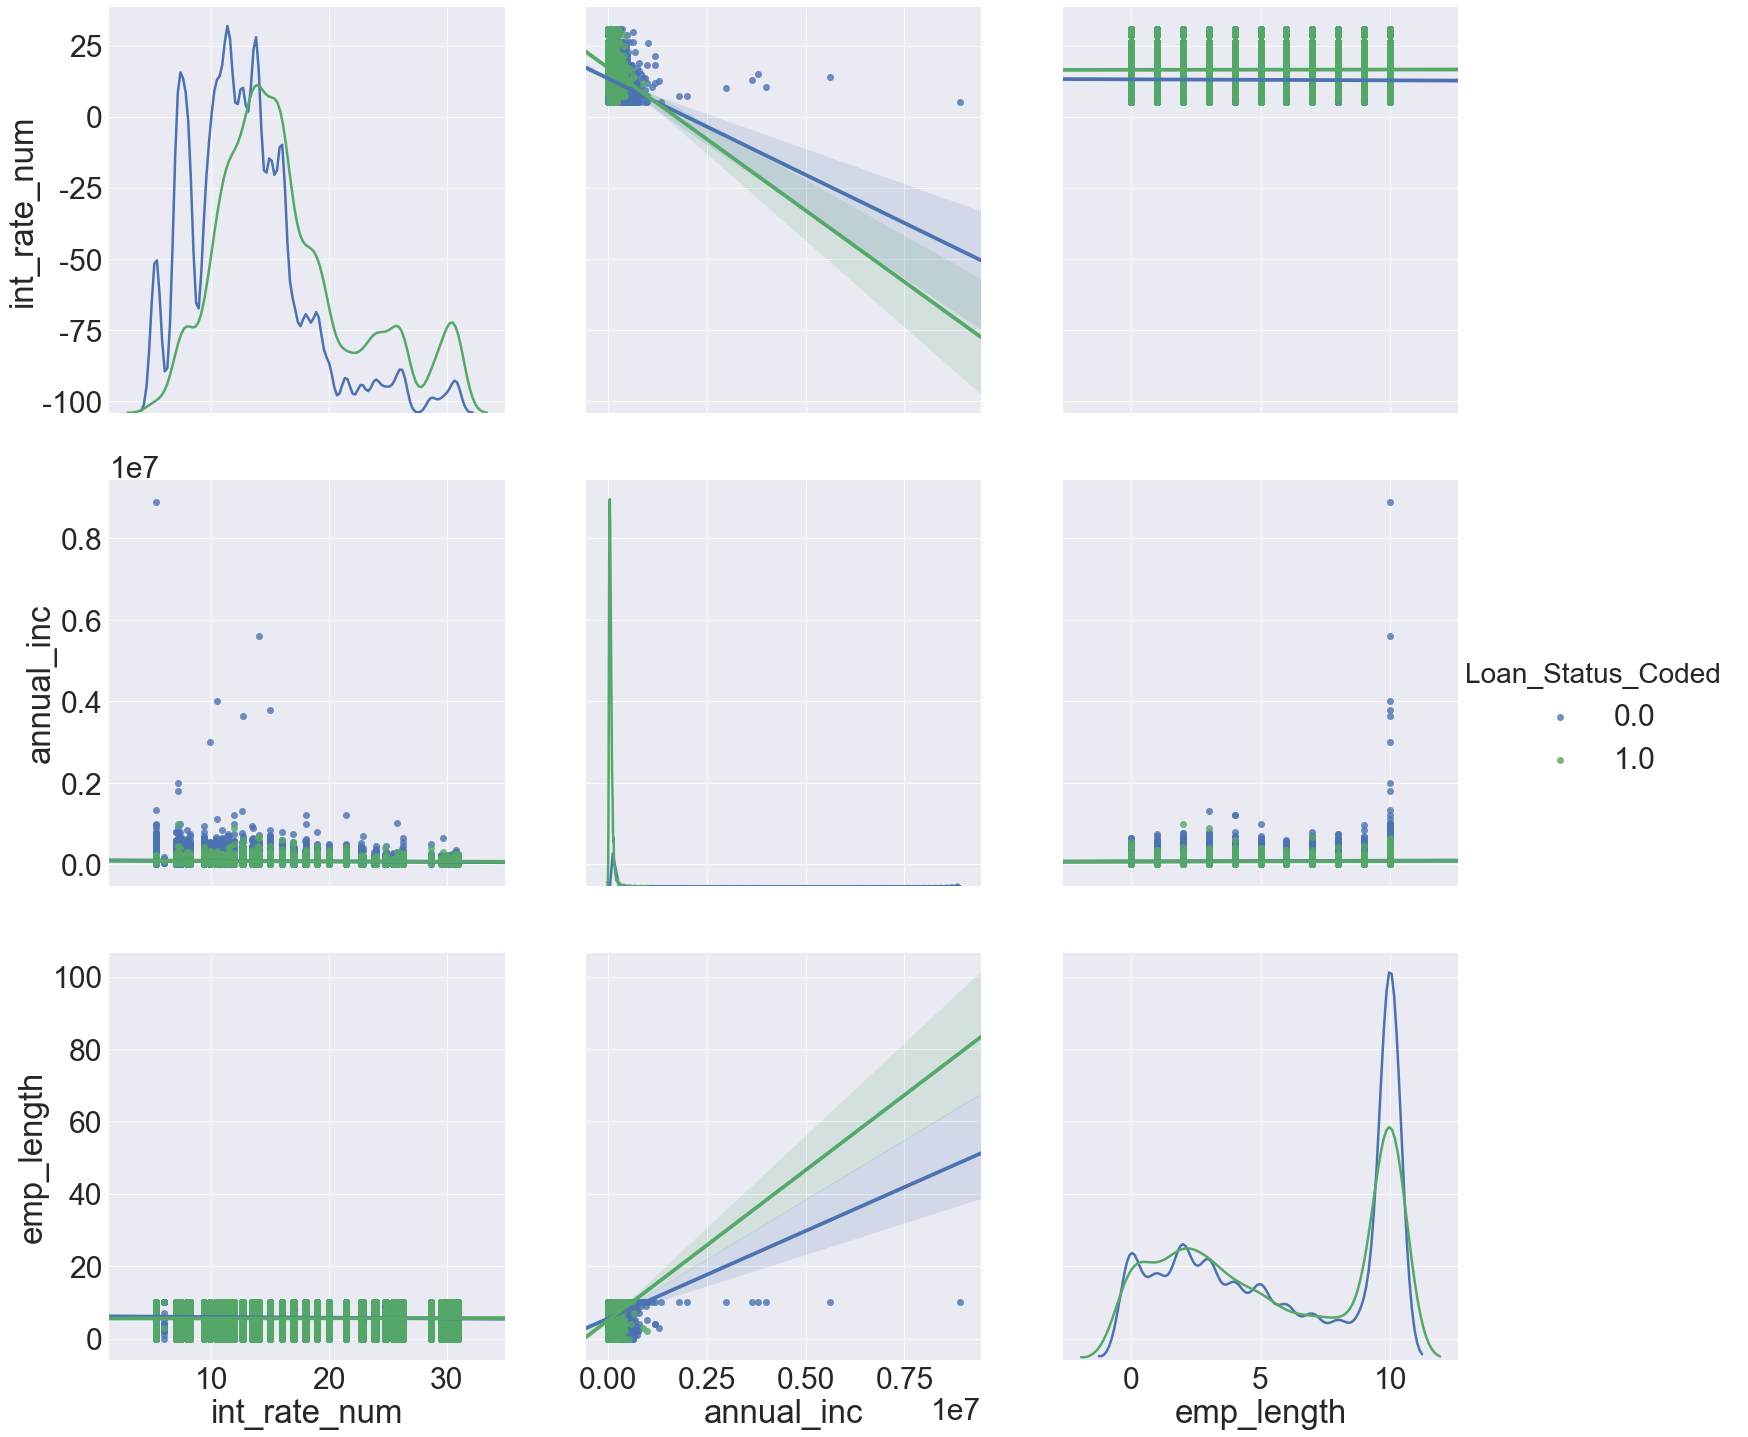

In [95]:
sns.set_context("notebook", font_scale=3, rc={"lines.linewidth": 2.5})
p_plot = sns.pairplot(used_data, vars=["int_rate_num","annual_inc", "emp_length"], hue="Loan_Status_Coded", diag_kind="kde" ,kind="reg", size = 7)
p_plot.savefig("Interest Rate VS Annual Income VS Emp_length")

从图可以看出，工作年限越长，客户的收入也越高，自身现金流比较充足，此类客户偿还债务的能力较强，违约的情况较少，相应享受更低的利率。

# 总结

In [96]:
used_data.corr() #计算相关系数

,loan_amnt,annual_inc,emp_length,Loan_Status_Coded,int_rate_num
loan_amnt,NaN,NaN,NaN,NaN,NaN
annual_inc,NaN,1.000000,0.092955,-0.026782,-0.098720
emp_length,NaN,0.092955,1.000000,-0.023714,-0.027268
Loan_Status_Coded,NaN,-0.026782,-0.023714,1.000000,0.206542
int_rate_num,NaN,-0.098720,-0.027268,0.206542,1.000000


<Figure size 1368x648 with 0 Axes>

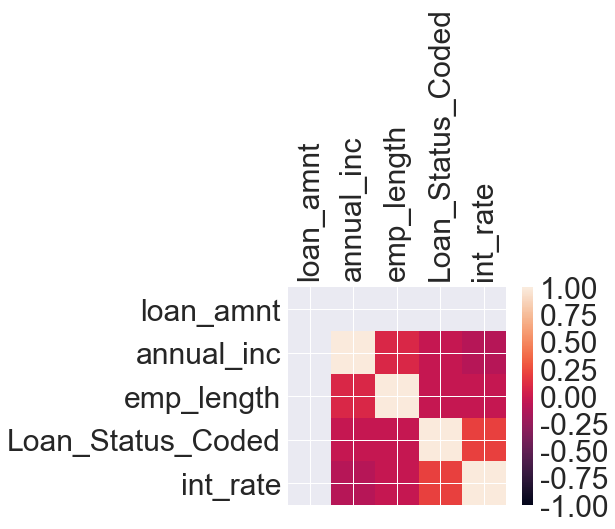

In [97]:
# 相关系数图
names = ['loan_amnt', 'annual_inc' ,'emp_length', 'Loan_Status_Coded','int_rate' ] #设置变量名
correlations = used_data.corr()
# plot correlation matrix
plt.figure(figsize=(19, 9))
fig = plt.figure() #调用figure创建一个绘图对象
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)  #绘制热力图，从-1到1
fig.colorbar(cax)  #将matshow生成热力图设置为颜色渐变条
ticks = np.arange(0,5,1) #生成0-5，步长为1
ax.set_xticks(ticks)  #生成刻度
ax.set_yticks(ticks)
ax.set_xticklabels(names) #生成x轴标签
ax.set_yticklabels(names)
plt.xticks(rotation=90)
fig.savefig("Corr")
plt.show()


# 1.影响风险的因素

分析企业偿债能力主要考察企业的资产状况和经营情况，只有负债结构与企业盈利能力合理匹配，企业才能持续稳定地发展。

个人的资产状况好比企业的资产负债表，个人收入犹如企业的利润表或现金流量表。高收入的客户意味着有良好的现金流，偿还债务能力较高，违约的可能性较低，一般来说此类客户的信用评级也相对较高，平台对应的贷款资产风险也相对较低；个人过往的信用记录能够反映客户的偿还意愿，长期有不良信用记录的客户再次发生违约的可能性也较高，为对违约风险，对此类客户应匹配更高的利率定价。

# 2.Lending Club 平台特点

平台业务持续稳定发展：第二季度业务持续增长，平台业务主要集中于加州、德克萨斯州和纽约州。
平台贷款金额以 小额贷款为主，贷款金额主要集中在10,000美元左右，小而散的贷款金额能够很好的分散资金风险。
平台贷款利率较高，贷款利率集中在12.62%，贷款利率相对传统金融机构较高。
平台二季度违约风险得到良好的控制，平台贷款发生违约的数量较少，贷款正常状态占比为90.05%。

# 3.个人建议

完善客户画像和产品设计：信贷业务开展前，首先要明确信贷机构的目标客户群、目标客户的特征和画像信息是什么。例如Lending Club平台的small business业务，中小企业目标群体的特征描述应包括能够反映企业的资产负债和现金流相关的财务报表信息或表外债务信息等。完整的客户信息有利于风控人员和系统分析把控违约风险。
优化贷款模型：完善客户信息的同时，借助机器学习的技术持续优化贷款模型。